The objective for Data Analysis: I will be assuming the role of a data analyst in an e-commerce company that operates overall multiple regions with multiple product skews. The goal of this data analysis is to understand more about the sales performance of various products.
The data analysis will take three steps:
Step 1: Cleaning the data.
	This will involve removing missing values and outliers.
Step 2: Transforming the data.
	This will involve adding new columns and modifying data to make it easier for analysis.
Step 3: Analyzing the data.
	This will involve analyzing the data at an overall VP level and analyzing the data at a regional sales manager level.
Each step will have its own description before it starts. Furthermore, each line of code will be annotated to explain its purpose. Also any assumptions that are made will be stated.


In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

The above line of code is necessary to import pandas, seaborn, numpy, matplotlib, math, and scipy numpy which are the packages required for this analysis.

In [220]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignments/sales_data%20(1)%20-%20Copy.csv")

The above line of code is used to read the excel file store on github and store into a dataframe titled 'df'. 

In [221]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


print the dataframe

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


display info on the dataframe

In [223]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


describe some statistics regarding the datrame

Step 1: Cleaning the data.

The data analysis will help the sales managers and sales VP come up with an efficient strategy for the 2025 sales year. Before coming up with those questions to answer, visualizing observations, and recommending actions, I will start by cleaning the dataset. 

The idea of cleaning this dataset is to ensure that someone coming into this code for the first time will be able to understand precisely what variables I removed and why I did so. I would also like the guarantee that if they need to make modifications to my analysis due to new information on values or rerun the same analysis for themselves, they will have the means to do so within the code.

The issue of tackling missing data will be solved by deciding to replace and fill in the values.
If the missing data is numerical then the data should be filled with an appropriate value-based central limit theory. This is because it will not affect the spread of the data. 

If the missing data is categorical, then the data should be removed for the purpose of the analysis. This is because filling these values with an appropriate value based on the central limit theory would affect the spread of data without contributing additional insights as the soultion would be to add new categorical variables for undefined and missing values.

The next part would be to take care of outliers. To identify if there are outliers histograms, boxplots, and scatterplots will be used to determine if the data has outliers. Then based on central limit theory they will be removed from the analysis.


In [224]:
column_dict = {'Product':'product_sku', 'Region':'region','Price':'price_per_unit', 
               'Units Sold':'units_sold','Sale Date':'sale_date' }
df= df.rename(columns=column_dict)
df

,product_sku,region,price_per_unit,units_sold,sale_date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Create a list of  the old column headings and new easier to work with headings
use the rename function to replace the column headings. Note that an assumption was made that the Price column represented price per unit.

In [225]:
df.isna().sum()

product_sku       103
region            104
price_per_unit    105
units_sold        104
sale_date           0
dtype: int64

Use the isna function to check if their any missing values in each column and sum the total number of missing values.

In [226]:
print(df.isna().any())


product_sku        True
region             True
price_per_unit     True
units_sold         True
sale_date         False
dtype: bool


Use the boolean function .any to check if the dataframe columns has any missing values so its easy to compare with down the line.

In [227]:
print(df.isnull())

      product_sku  region  price_per_unit  units_sold  sale_date
0            True   False           False       False      False
1            True   False           False       False      False
2           False   False           False       False      False
3           False   False           False       False      False
4           False   False           False       False      False
...           ...     ...             ...         ...        ...
1045        False   False           False       False      False
1046        False   False            True       False      False
1047        False   False           False       False      False
1048         True   False            True       False      False
1049        False   False           False       False      False

[1050 rows x 5 columns]


Print the data set with the boolean function isnull to see true and false for where data is missing.

<Axes: xlabel='units_sold', ylabel='Count'>

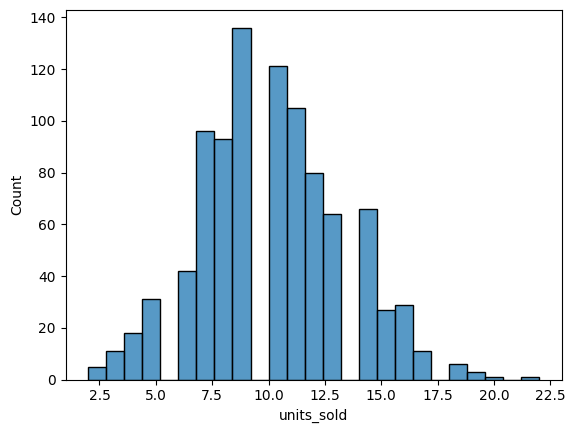

In [228]:
sns.histplot(df['units_sold'])

Create a histogram for the units_sold column to see how it is distributed. Based on the output it seems that is normally distributed with no skewness.

In [229]:
data =df['units_sold']


Create a temporary dataframe called data with the units sold column to check kurtosis and skewness.

In [230]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data, fisher=True))


Kurtosis (scipy):  nan


Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive yet very close to zero the data is very slightly peaked.

In [231]:
def skewness(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance.

The calculate the skewneness which is sum each datapoint subratec the mean cubed divied by the standard deviation.

In [232]:
print(skewness(data))


nan


Based on the above return the skewness. Since the skew is between -0.5 and 0.5 that data is not skewed positively or negatively.

In [233]:
units_sold_mean = df['units_sold'].mean()


Since it is normally distriubted with no skewness I have determined the best approach is to fill the missing data with the mean. So this function uses the .mean() function to get the mean of units sold and store the value in units_sold_mean.

In [234]:
df['units_sold'].fillna(value=units_sold_mean, inplace= True)

This uses the fillna function to replace empty values in units_sold with the units_sold_mean value. The inplace argument is left as True so the change is permanent.

<Axes: xlabel='units_sold', ylabel='Count'>

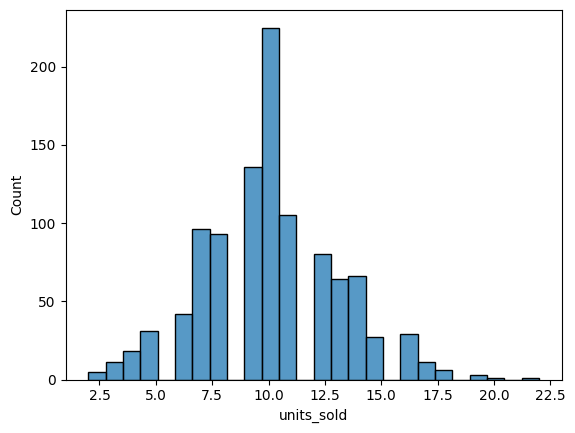

In [235]:
sns.histplot(df['units_sold'])

We dispaly the histogram again to view the change as a new column that is over a count of 200 is a direct result of filling in the missing values we saw earlier.

In [236]:
df.describe(include='all')

,product_sku,region,price_per_unit,units_sold,sale_date
count,947,946,945.000000,1050.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.010905,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


We run the describe function to check if the mean has changed and it has not.

<Axes: xlabel='price_per_unit', ylabel='Count'>

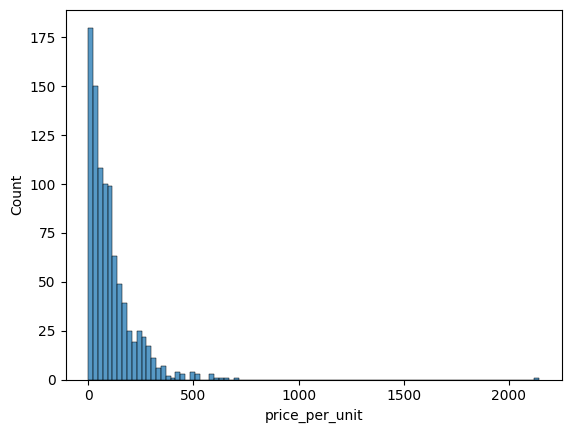

In [237]:
sns.histplot(df['price_per_unit'])

Create a histogram for the price_per_unit column to see how it is distributed. Based on the output it seems that the data skewed to the left.

In [238]:
data2 =df['price_per_unit']

Create a temporary dataframe called data2 with the price_per_unit column to check kurtosis and skewness.

In [239]:
print("Kurtosis (scipy): ", scipy.stats.kurtosis(data2, fisher=True))

Kurtosis (scipy):  nan


Use the scipy.stats.kurtosis to check the kurtosis value.
Since it is positive and greater than 3 this indicates a leptokurtic distriubtion. This means the data has very thick tails, with a high concentration of data around the tails, and there is a high chance of outliers. This means we should be careful when removing outliers.

In [240]:
def skewness(data2):
    n = len(data2)
    mean = sum(data2) / n
    variance = sum((x - mean) ** 2 for x in data2) / n
    std_dev = math.sqrt(variance)
    
    skewness = sum((x - mean) ** 3 for x in data2) / (n * std_dev ** 3)
    return skewness

Create a formula using the length of the data, the mean of the data divided by length, the variance which is calculated by getting the total sum of squares, and then the standard deviation which is the square root of variance.

The calculate the skewneness which is sum each datapoint subratec the mean cubed divied by the standard deviation.

In [241]:
print(skewness(data2))

nan


Based on the above return the skewness. Since the skew is greater than 1 the data is extremely positivley skewed. This means that there is a huge tail on the right hand side of the data.

In [242]:
price_per_unit_median = df['price_per_unit'].median()

Since there the data is extremely positively skewed I have determined the best approach is to fill the missing data with the median. So this function uses the .median() function to get the median of price_per_unit and store the value in price_per_unit_median

In [243]:
df['price_per_unit'].fillna(value=price_per_unit_median, inplace= True)

This uses the fillna function to replace empty values in price_per_unit with the price_per_unit_median value. The inplace argument is left as True so the change is permanent.

<Axes: xlabel='price_per_unit', ylabel='Count'>

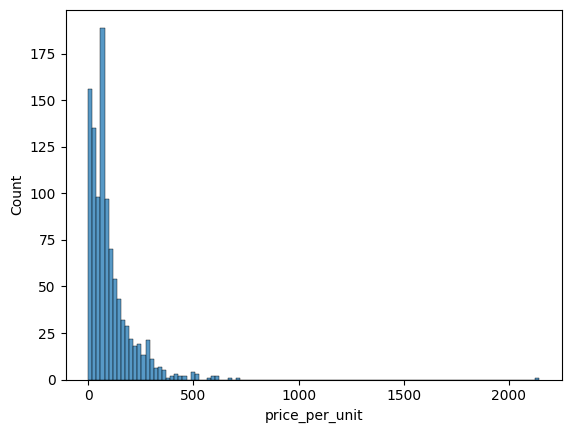

In [244]:
sns.histplot(df['price_per_unit'])

We dispaly the histogram again to view the change as a large column that is over a count of 175 that is a direct result of filling in the missing values we saw earlier.

In [245]:
df.describe(include='all')

,product_sku,region,price_per_unit,units_sold,sale_date
count,947,946,1050.000000,1050.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,104.651819,10.048626,NaN
std,NaN,NaN,117.981782,3.010905,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.855000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,133.300000,12.000000,NaN


We run the describe function to check if the mean has changed and it has but only 3 units of the currency the price is in.

In [246]:
df.drop_duplicates(inplace=True)

We use the drop_duplicates value to see drop any values that are the exact same. This is to account for any entry error.

In [247]:
print(df.isna().any())

product_sku        True
region             True
price_per_unit    False
units_sold        False
sale_date         False
dtype: bool


We print to ensure the values we just filled are in the dataset. Since price_per_unit and units_sold return false they have been filled.

In [248]:
df_storage = df['product_sku'].fillna("sku_undefined")
df_storage = df['region'].fillna("region_missing")

This code fills the missing product_sku and missing region with text values and stores them in a dataset in df_storage. This is so if someone from the internal side of the company can look in the code fill in those missing variables and re run the dataset they can do it within the code. They would not have to input the values into the excel stored on github as they could enter them directly into df_storage.

In [249]:
print(df.isna().any())


product_sku        True
region             True
price_per_unit    False
units_sold        False
sale_date         False
dtype: bool


This code checks to ensure that product_sku and regions are still missing values in 'df'. This is because we do not believe they are unusable for the analysis detailed at the beginning due to the missing values.

In [250]:
print(df_storage.isna().any())

False


This code checks that dataframe storage has no missing values.

In [251]:
df.dropna(inplace=True)

This code then drops the missing values in product_sku and region. This is because I do not believe this data is useful for the data analysis. If they are listed as underfined and other they will not contribute to making insights for specific product performance. 

In [252]:
df

,product_sku,region,price_per_unit,units_sold,sale_date
2,Product_46,Region_3,20.43,12.000000,2022-01-03
3,Product_36,Region_1,12.77,10.000000,2022-01-04
4,Product_17,Region_6,125.69,6.000000,2022-01-05
5,Product_45,Region_1,8.63,11.000000,2022-01-06
6,Product_31,Region_3,23.73,6.000000,2022-01-07
...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.048626,2024-09-15
993,Product_7,Region_9,128.51,17.000000,2024-09-20
994,Product_1,Region_4,95.24,7.000000,2024-09-21
998,Product_2,Region_10,43.44,15.000000,2024-09-25


We print the dataframe again cause we have not seen it in awhile just to check.

In [253]:
print(df.isna().any())

product_sku       False
region            False
price_per_unit    False
units_sold        False
sale_date         False
dtype: bool


This code checks that dataframe 'df' has no missing values.

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 2 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_sku     810 non-null    object 
 1   region          810 non-null    object 
 2   price_per_unit  810 non-null    float64
 3   units_sold      810 non-null    float64
 4   sale_date       810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.0+ KB


We print some basic info that mainly shows us that we are now at 810 entries from the initial 1050. This means we have cleared about 240 entries from the data.

In [255]:
df.describe(include='all')

,product_sku,region,price_per_unit,units_sold,sale_date
count,810,810,810.000000,810.000000,810
unique,50,10,NaN,NaN,810
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,96,NaN,NaN,1
mean,NaN,NaN,103.918815,10.098570,NaN
std,NaN,NaN,122.587295,3.067497,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.805000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,129.317500,12.000000,NaN


We print some statistics and see that our mean for both units_sold and price_per_unit have changed slightly.

<Axes: xlabel='price_per_unit', ylabel='Count'>

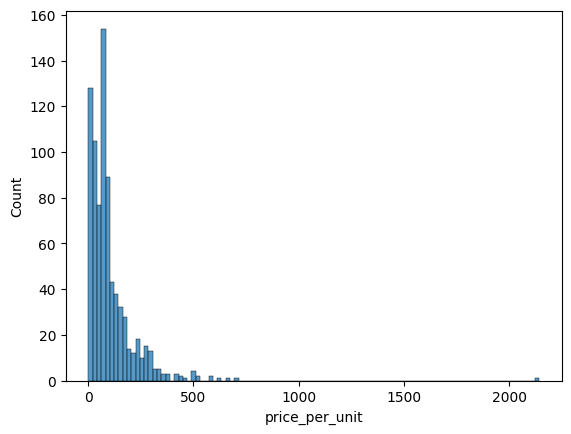

In [256]:
sns.histplot(df['price_per_unit'])

We noticed above that their was an outlier in the histogram and now we are going to treat it.

In [257]:
df[df['price_per_unit']>2000]

,product_sku,region,price_per_unit,units_sold,sale_date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


We isolate for any indexes above 2000 and we find index 969.

In [258]:
df.drop(969, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

<Axes: xlabel='price_per_unit', ylabel='Count'>

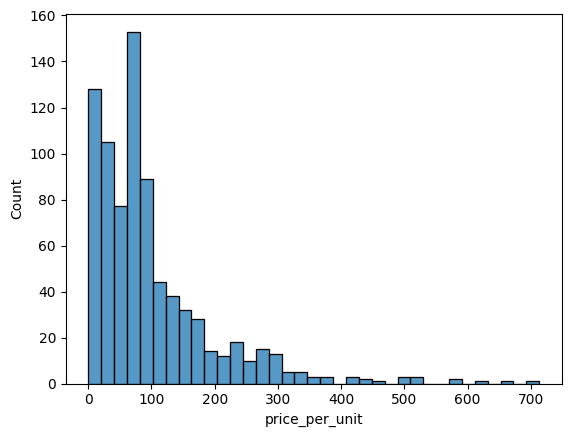

In [259]:
sns.histplot(df['price_per_unit'])

We print our new histogram to see that we have removed the outlier.

<Axes: xlabel='units_sold', ylabel='Count'>

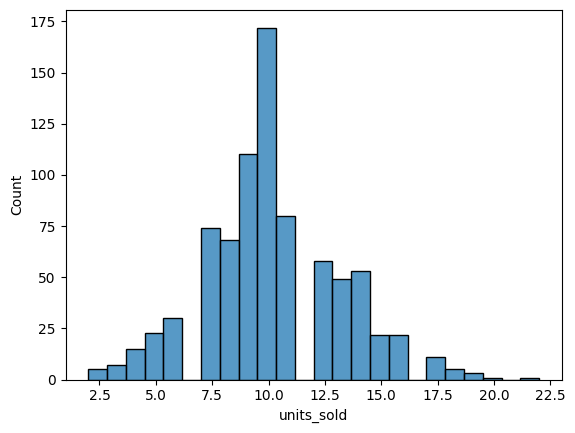

In [260]:
sns.histplot(df['units_sold'])

We repeat the same process with units_sold to check for outliers.

In [261]:
df[df['units_sold']>20]

,product_sku,region,price_per_unit,units_sold,sale_date
719,Product_50,Region_4,86.73,22.0,2023-12-21


We isolate for indexes above 20 and find index 719.

In [262]:
df.drop(719, axis=0, inplace=True)

We drop index 969 from the dataplace permanently with the drop function and inplace = True.

<Axes: xlabel='units_sold', ylabel='Count'>

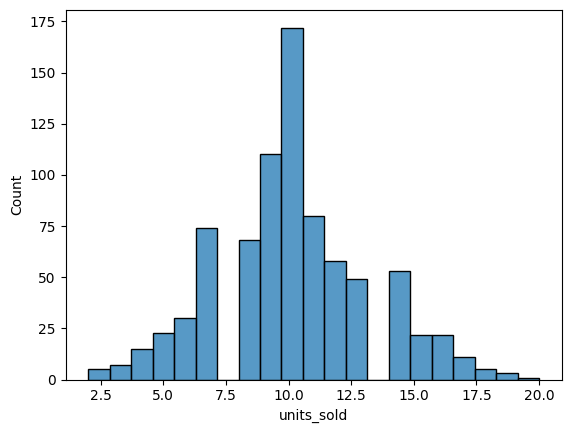

In [263]:
sns.histplot(df['units_sold'])

We print our new histogram to see that we have removed the outlier.

<Axes: xlabel='price_per_unit'>

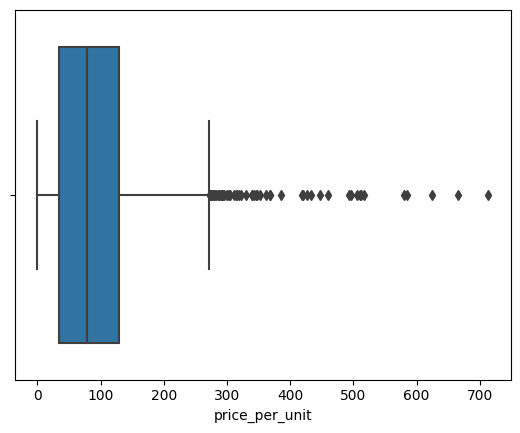

In [264]:
sns.boxplot(data = df, x = 'price_per_unit')

We print a boxplot to check if their are any more outliers in the data. We come across a lot of data being greater than 300 which approximatley the upper extreme of the whisker.

In [265]:
df[df['price_per_unit']>300]

,product_sku,region,price_per_unit,units_sold,sale_date
107,Product_49,Region_2,329.37,8.000000,2022-04-18
133,Product_40,Region_5,368.76,7.000000,2022-05-14
178,Product_23,Region_2,300.82,10.000000,2022-06-28
186,Product_34,Region_2,310.46,9.000000,2022-07-06
189,Product_35,Region_1,511.74,10.000000,2022-07-09
234,Product_34,Region_9,496.61,8.000000,2022-08-23
264,Product_14,Region_7,517.29,10.000000,2022-09-22
275,Product_16,Region_4,433.17,13.000000,2022-10-03
276,Product_48,Region_8,418.24,14.000000,2022-10-04
293,Product_22,Region_2,493.20,10.048626,2022-10-21


We isolate those under 300 and determine there are a lot of indices above 300 and decide to come back to analyze it further using a different plot.

<Axes: xlabel='units_sold'>

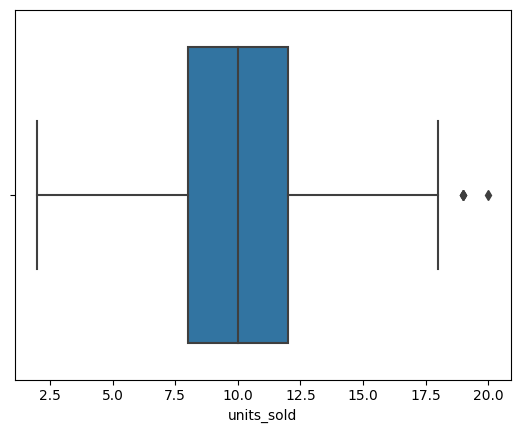

In [266]:
sns.boxplot(data = df, x = 'units_sold')

We create a boxplot of the units_sold which presents a more reasonable boxplot since it is normally distributed.

In [267]:
df[df['units_sold']>18]

,product_sku,region,price_per_unit,units_sold,sale_date
221,Product_5,Region_5,50.36,20.0,2022-08-10
232,Product_14,Region_3,104.27,19.0,2022-08-21
912,Product_22,Region_8,78.13,19.0,2024-07-01
962,Product_13,Region_7,0.61,19.0,2024-08-20


We isolate for units above the upper extreme and find some indices.

In [268]:
df.drop(df[df['units_sold']>18].index, axis=0, inplace=True)


We decide to use the drop function to permanently drop all indices that met the boolean of being greater than 18 using inpalce=True to make it permanent.

<Axes: xlabel='units_sold'>

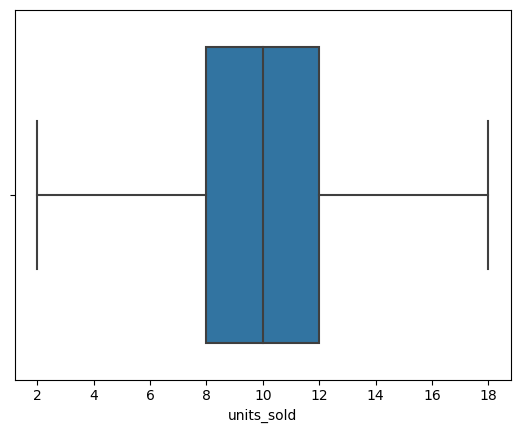

In [269]:
sns.boxplot(data = df, x = 'units_sold')

We remake the boxplot to show no more outliers.

<Axes: xlabel='units_sold', ylabel='price_per_unit'>

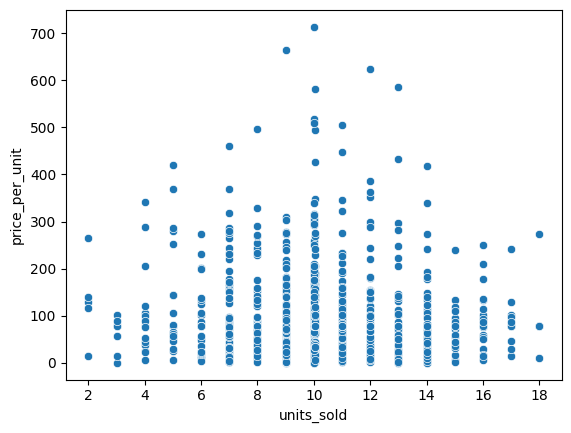

In [270]:
sns.scatterplot(data=df, x='units_sold',y='price_per_unit')

We create a scatterplot to see if we can further find outliers in price_per_unit or if the boxplot was just misdjuding due the data being skewed to the left.

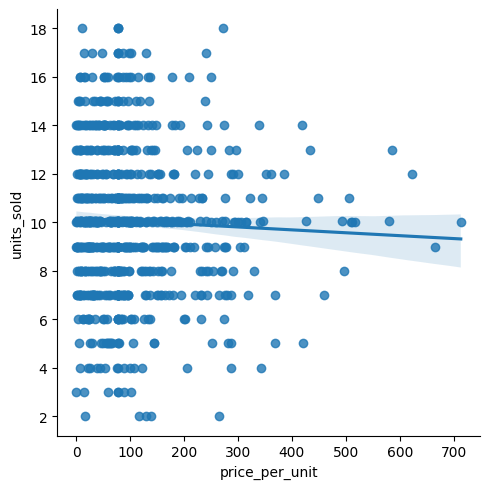

In [271]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We create a scatterplot with a line of best and a different orientation to see if we can further enhance the findings from the scatterplot.

In [272]:
df[df['price_per_unit']>550]

,product_sku,region,price_per_unit,units_sold,sale_date
437,Product_26,Region_8,585.17,13.000000,2023-03-14
684,Product_45,Region_8,580.60,10.048626,2023-11-16
728,Product_31,Region_3,665.00,9.000000,2023-12-30
814,Product_26,Region_2,623.60,12.000000,2024-03-25
853,Product_41,Region_1,713.29,10.000000,2024-05-03


Based on the two scatterplots and the boxplot there seems to be a cluster data from 300 to 550. However past 550 there are only a few datapoints. Therefore the conclusion is to isolate for indices greater than 550.

In [273]:
df.drop(df[df['price_per_unit']>550].index, axis=0, inplace=True)

This conclusion seems much more reasonable than the number of outliers concluded from the sole analysis of the boxplot. Therefore we will use the drop function to permanaently drop any index above 550 using inplace=True to ensure it is permanent.

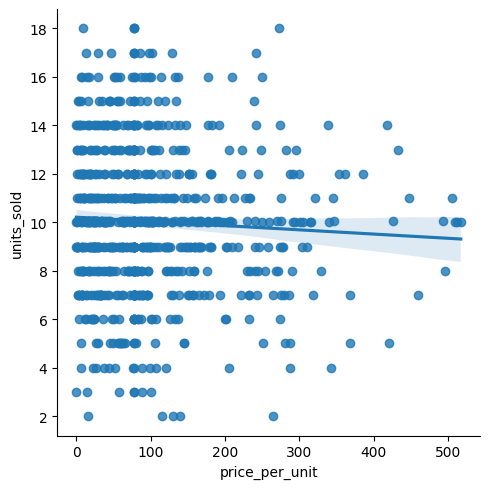

In [274]:
sns.lmplot(data=df, x='price_per_unit',y='units_sold', fit_reg=True)

We reprint scatter plot with line of best fit to ensure the data looks good.

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 2 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_sku     799 non-null    object 
 1   region          799 non-null    object 
 2   price_per_unit  799 non-null    float64
 3   units_sold      799 non-null    float64
 4   sale_date       799 non-null    object 
dtypes: float64(2), object(3)
memory usage: 37.5+ KB


We run the info function to determine that we now have 799 entries. This means we have cleaned about 11 entries from the 810. In total we have cleaned 11+240=251 entries from the orignal data set of 1050 entries.

In [276]:
df.describe(include='all')

,product_sku,region,price_per_unit,units_sold,sale_date
count,799,799,799.000000,799.000000,799
unique,50,10,NaN,NaN,799
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,27,96,NaN,NaN,1
mean,NaN,NaN,98.301852,10.039791,NaN
std,NaN,NaN,90.553416,2.981337,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.650000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,127.845000,12.000000,NaN


Now that we have removed our outliers we can see that the units_sold mean has marginally changed from the initial 10.04 to 10.03. While the price_per_unit mean slightly decreased from the initial 107.59 to 98.03. We make a careful note that this was due to removing & filling missing data, dropping duplicates, removing outliers.

Step 2 and 3:
I will transform the data based on the following questions I want to answer. Then I will use the data to visualize the observations. These observations will take two categories. Firstly, the data of summary statistics will be organized and visualized to figure out the big-picture decisions on a department-wide and regional sales level. Secondly, specific product-by-region recommendations will be made according to the recommendation matrix to find the specific fixes for the sales performance of products on department-wide and regional sales levels. The table is located in the attached microsoft document.


In [277]:
print(df['product_sku'].unique())

['Product_46' 'Product_36' 'Product_17' 'Product_45' 'Product_31'
 'Product_18' 'Product_16' 'Product_9' 'Product_20' 'Product_1'
 'Product_2' 'Product_3' 'Product_43' 'Product_33' 'Product_14'
 'Product_50' 'Product_6' 'Product_13' 'Product_11' 'Product_27'
 'Product_28' 'Product_24' 'Product_34' 'Product_25' 'Product_4'
 'Product_48' 'Product_10' 'Product_49' 'Product_12' 'Product_42'
 'Product_5' 'Product_26' 'Product_8' 'Product_37' 'Product_22'
 'Product_32' 'Product_23' 'Product_35' 'Product_15' 'Product_29'
 'Product_44' 'Product_47' 'Product_41' 'Product_39' 'Product_30'
 'Product_40' 'Product_21' 'Product_38' 'Product_19' 'Product_7']


Firstly I want to prepare the data so that the labels are shorter and taht they can be sorted numerically so I am going to print a unique list of product_sku.

In [278]:

df = df.replace(['Product_46', 'Product_36', 'Product_17', 'Product_45', 'Product_31',
 'Product_18', 'Product_16', 'Product_9', 'Product_20', 'Product_1',
 'Product_2', 'Product_3', 'Product_43', 'Product_33', 'Product_14',
 'Product_50', 'Product_6', 'Product_13', 'Product_11', 'Product_27',
 'Product_28', 'Product_24', 'Product_34', 'Product_25', 'Product_4',
 'Product_48', 'Product_10', 'Product_49', 'Product_12', 'Product_42',
 'Product_5', 'Product_26', 'Product_8', 'Product_37', 'Product_22',
 'Product_32', 'Product_23', 'Product_35', 'Product_15', 'Product_29',
 'Product_44', 'Product_47', 'Product_41', 'Product_39', 'Product_30',
 'Product_40', 'Product_21', 'Product_38', 'Product_19', 'Product_7'], [46, 36, 17, 45, 31,
 18, 16, 9, 20, 1,
 2, 3, 43, 33, 14,
 50, 6, 13, 11, 27,
 28, 24, 34, 25, 4,
 48, 10, 49, 12, 42,
 5, 26, 8, 37, 22,
 32, 23, 35, 15, 29,
 44, 47, 41, 39, 30,
 40, 21, 38, 19, 7]
)

df

,product_sku,region,price_per_unit,units_sold,sale_date
2,46,Region_3,20.43,12.000000,2022-01-03
3,36,Region_1,12.77,10.000000,2022-01-04
4,17,Region_6,125.69,6.000000,2022-01-05
5,45,Region_1,8.63,11.000000,2022-01-06
6,31,Region_3,23.73,6.000000,2022-01-07
...,...,...,...,...,...
988,42,Region_9,240.97,10.048626,2024-09-15
993,7,Region_9,128.51,17.000000,2024-09-20
994,1,Region_4,95.24,7.000000,2024-09-21
998,2,Region_10,43.44,15.000000,2024-09-25


Then I am going to replace the string Product_#X with the integer #X.

In [279]:
df.sort_values(by=['product_sku'], ascending=True,inplace=True)
df

,product_sku,region,price_per_unit,units_sold,sale_date
848,1,Region_8,26.44,11.0,2024-04-28
140,1,Region_4,28.61,9.0,2022-05-21
312,1,Region_3,78.13,10.0,2022-11-09
34,1,Region_9,47.90,11.0,2022-02-04
393,1,Region_6,64.53,10.0,2023-01-29
...,...,...,...,...,...
785,50,Region_9,146.87,9.0,2024-02-25
778,50,Region_1,161.12,11.0,2024-02-18
299,50,Region_3,51.82,14.0,2022-10-27
890,50,Region_6,8.64,12.0,2024-06-09


Then I am going to sort by product_sku.

In [280]:
print(df['region'].unique())

['Region_8' 'Region_4' 'Region_3' 'Region_9' 'Region_6' 'Region_1'
 'Region_10' 'Region_5' 'Region_2' 'Region_7']


I am going to do the same with the labels for Region starting printing a list of unique values.

In [281]:
df = df.replace(['Region_3', 'Region_1', 'Region_6', 'Region_7', 'Region_9', 'Region_2',
 'Region_4', 'Region_5', 'Region_8', 'Region_10'], [3, 1, 6, 7, 9, 2,
 4, 5, 8, 10] 
)
df

,product_sku,region,price_per_unit,units_sold,sale_date
848,1,8,26.44,11.0,2024-04-28
140,1,4,28.61,9.0,2022-05-21
312,1,3,78.13,10.0,2022-11-09
34,1,9,47.90,11.0,2022-02-04
393,1,6,64.53,10.0,2023-01-29
...,...,...,...,...,...
785,50,9,146.87,9.0,2024-02-25
778,50,1,161.12,11.0,2024-02-18
299,50,3,51.82,14.0,2022-10-27
890,50,6,8.64,12.0,2024-06-09


I am replacing the string Region_#X with the integer #X.

In [282]:
df.sort_values(by=['region'], ascending=True,inplace=True)
df

,product_sku,region,price_per_unit,units_sold,sale_date
758,22,1,78.13,12.0,2024-01-29
295,13,1,17.00,16.0,2022-10-23
3,36,1,12.77,10.0,2022-01-04
113,13,1,56.04,10.0,2022-04-24
713,5,1,26.20,9.0,2023-12-15
...,...,...,...,...,...
248,31,10,143.74,11.0,2022-09-06
440,44,10,102.84,13.0,2023-03-17
793,43,10,71.78,13.0,2024-03-04
351,14,10,133.35,14.0,2022-12-18


Then I am going to sort by region.

In [283]:
columns_titles = ["region","product_sku","price_per_unit","units_sold","sale_date"]
df=df.reindex(columns=columns_titles)
df

,region,product_sku,price_per_unit,units_sold,sale_date
758,1,22,78.13,12.0,2024-01-29
295,1,13,17.00,16.0,2022-10-23
3,1,36,12.77,10.0,2022-01-04
113,1,13,56.04,10.0,2022-04-24
713,1,5,26.20,9.0,2023-12-15
...,...,...,...,...,...
248,10,31,143.74,11.0,2022-09-06
440,10,44,102.84,13.0,2023-03-17
793,10,43,71.78,13.0,2024-03-04
351,10,14,133.35,14.0,2022-12-18


I decided that for my analysis it would better to have region first so I reindexed the columns accordingly.

In [284]:
print(df.groupby('product_sku')['units_sold'].mean())

product_sku
1      9.842105
2     10.727625
3     11.250000
4     10.774938
5      8.899695
6      8.714463
7     11.230769
8     10.853635
9     10.873150
10    11.360616
11    11.014588
12    10.181818
13    10.178141
14    10.721232
15    11.065539
16    10.277778
17     9.836035
18    10.161327
19    10.052632
20    10.091438
21    10.938991
22     9.224706
23    10.756078
24    10.217759
25     9.414625
26     9.400000
27    10.756078
28    10.311433
29     9.674771
30    10.433849
31    10.000000
32     9.000000
33     9.240411
34    10.238154
35     9.878039
36     9.008104
37     9.767566
38     9.372477
39     8.432045
40     9.005721
41    10.533333
42     9.696617
43    10.478506
44     9.619215
45     8.658500
46     9.844665
47     9.622866
48    11.000000
49     9.500000
50    10.954863
Name: units_sold, dtype: float64


In [285]:
df['year_sold'] = pd.DatetimeIndex(df['sale_date']).year
df['month_sold'] = pd.DatetimeIndex(df['sale_date']).month
df['quarter_sold'] = pd.PeriodIndex(df.sale_date, freq='Q')
df['sales_revenue'] = df['units_sold'] * df['price_per_unit']
df['CW_units_sold'] = df.groupby('product_sku')['units_sold'].transform('mean')
df['CW_price_per_unit'] = df.groupby('product_sku')['price_per_unit'].transform('mean')
df['CW_sales_revenue'] = df.groupby('product_sku')['sales_revenue'].transform('mean')
df['Dif_sales_revenue'] = (df['sales_revenue']- df['CW_sales_revenue'])/df['CW_sales_revenue']
df['Dif_price_per_unit'] = (df['price_per_unit']- df['CW_price_per_unit'])/df['CW_price_per_unit']
df['Dif_units_sold'] = (df['units_sold']- df['CW_units_sold'])/df['CW_units_sold']



def conditions(df):    
    if df['Dif_sales_revenue'] > 0: matrix = "High"
    elif df['Dif_sales_revenue'] == 0:     matrix = "Avg"
    elif df['Dif_sales_revenue'] < 0:     matrix = "Low"
    else: matrix = "ERR"
        
    return matrix

df['mtr_sales_revenue'] = df.apply(conditions, axis=1)


def conditions1(df):    
    if df['Dif_price_per_unit'] > 0: matrix = "High"
    elif df['Dif_price_per_unit'] == 0:     matrix = "Avg"
    elif df['Dif_price_per_unit'] < 0:     matrix = "Low"
    else: matrix = "ERR"
        
    return matrix

df['mtr_price_per_unit'] = df.apply(conditions1, axis=1)

def conditions2(df):    
    if df['Dif_units_sold'] > 0: matrix = "High"
    elif df['Dif_units_sold'] == 0:     matrix = "Avg"
    elif df['Dif_units_sold'] < 0:     matrix = "Low"
    else: matrix = "ERR"
        
    return matrix

df['mtr_units_sold'] = df.apply(conditions2, axis=1)



df


,region,product_sku,price_per_unit,units_sold,sale_date,year_sold,month_sold,quarter_sold,sales_revenue,CW_units_sold,CW_price_per_unit,CW_sales_revenue,Dif_sales_revenue,Dif_price_per_unit,Dif_units_sold,mtr_sales_revenue,mtr_price_per_unit,mtr_units_sold
758,1,22,78.13,12.0,2024-01-29,2024,1,2024Q1,937.56,9.224706,109.221429,1032.719496,-0.092145,-0.284664,0.300855,Low,Low,High
295,1,13,17.00,16.0,2022-10-23,2022,10,2022Q4,272.00,10.178141,90.996087,820.796576,-0.668615,-0.813179,0.571996,Low,Low,High
3,1,36,12.77,10.0,2022-01-04,2022,1,2022Q1,127.70,9.008104,82.728333,816.042056,-0.843513,-0.845639,0.110111,Low,Low,High
113,1,13,56.04,10.0,2022-04-24,2022,4,2022Q2,560.40,10.178141,90.996087,820.796576,-0.317249,-0.384149,-0.017502,Low,Low,Low
713,1,5,26.20,9.0,2023-12-15,2023,12,2023Q4,235.80,8.899695,73.858148,614.888196,-0.616516,-0.645266,0.011271,Low,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,10,31,143.74,11.0,2022-09-06,2022,9,2022Q3,1581.14,10.000000,119.125500,1204.174500,0.313049,0.206627,0.100000,High,High,High
440,10,44,102.84,13.0,2023-03-17,2023,3,2023Q1,1336.92,9.619215,92.478333,847.491646,0.577502,0.112044,0.351462,High,High,High
793,10,43,71.78,13.0,2024-03-04,2024,3,2024Q1,933.14,10.478506,66.860952,679.324396,0.373629,0.073571,0.240635,High,High,High
351,10,14,133.35,14.0,2022-12-18,2022,12,2022Q4,1866.90,10.721232,130.055714,1498.127976,0.246155,0.025330,0.305820,High,High,High


The above columns will help me answer my questions in the big picture statistical summary and the detailed product by region recommendation.
The year_sold, month_sold, quarter_sold will help me output summary statistics grouped by a certain time period (year, month, and season/quarter).
The columns with the prefix CW are the company-wide averages of units_sold, price_per_unit, and sales_revenue.
The columns with the prefix Dif are the differential statistics based on much greater or less the units_sold, price_per_unit, and sales_revenue are to the CW versions in decimals.
The columns with the prefix mtr are the boolean operators to determine which scenario each sale falls into based on units_sold, sales_revenue, and price_per_unit. To create these columns I created a variable called conditions. Then I stated one condition if the differential is greater than zero to return the value "High", if equal to zero then return the value "Avg", and if less than zero to return the value "low" in the next condition. as specified in the matrix table attached.

Step 3: For the VP of sales, I plan to answer to following questions by extracting observations and providing recommendations for the business:

What is the performance of the company over time?
What season does the company have best/worst sales in only using 2022 and 2023?
What was the company’s best and worst quarter?
What month is the best/worst?
What year is the best/worst?
Percentage increase/decrease in sales from 2022 to 2023?
Percentage increase/decrease in sales for Q1,Q2,Q3 from 2022 to 2023 to 2024?
Percentage increase/decrease in sales for Q4 from 2022 to 2023?


In [308]:
rev_by_quarter = df.groupby('quarter_sold')['sales_revenue'].sum()
rev_by_quarter


quarter_sold
2022Q1    54715.520423
2022Q2    59691.781649
2022Q3    78426.146977
2022Q4    87867.135708
2023Q1    65823.159408
2023Q2    70671.761438
2023Q3    75156.086173
2023Q4    68580.466448
2024Q1    73894.732748
2024Q2    69174.296871
2024Q3    73161.156596
Freq: Q-DEC, Name: sales_revenue, dtype: float64

The answer to following question: What is the performance of the company over time?

In [312]:
best_quarter_2022 = (rev_by_quarter =='2022').max()
worst_quarter_2022 = df.groupby('quarter_sold')['sales_revenue'].max()
best_quarter_2022

NameError: name 'rev_by_quarter' is not defined

In [286]:
p = df.pivot_table(index='product_sku', columns='region', values=['units_sold'])
p

units_sold                                                          
region              1          2          3          4          5          6    
product_sku                                                                     
1            10.500000  10.000000   9.000000   8.250000  16.000000   9.000000  \
2            14.333333   8.666667   5.666667   9.524313        NaN        NaN   
3                  NaN  16.500000   3.000000        NaN        NaN  14.000000   
4             7.000000        NaN  14.000000   8.333333  11.016209        NaN   
5            10.000000   8.666667   5.666667  11.000000   7.000000   9.409725   
6             7.016209   5.000000        NaN   8.012156  12.000000   6.500000   
7            13.000000  11.000000  12.000000   9.333333        NaN   6.000000   
8                  NaN        NaN        NaN  14.000000        NaN  13.000000   
9            10.000000   7.000000  14.000000        NaN  12.500000  10.048626   
10           13.000000  16.000000  17.000000  13.666667  12.000000  14.000000   
11                 NaN        NaN  14.000000        NaN  10.262156  10.349542   
12            8.000000   7.000000  11.000000        NaN   8.000000  12.000000   
13           11.500000  16.000000   8.000000        NaN   5.666667  12.262156   
14           10.000000   7.000000        NaN        NaN   9.524313   8.000000   
15           13.000000        NaN        NaN  10.349542  12.000000  10.500000   
16           11.000000  13.000000  12.500000  13.000000   9.400000   7.000000   
17            8.000000  12.000000   9.000000   9.666667  10.349542  10.333333   
18                 NaN  10.048626  11.666667   9.000000  10.500000  12.000000   
19           13.000000   9.000000  13.000000   9.333333        NaN  10.333333   
20           14.500000  10.048626   8.000000        NaN  10.500000   9.000000   
21            9.000000  12.000000  10.524313   9.000000  12.016209        NaN   
22           11.024313   9.524313        NaN   8.333333        NaN        NaN   
23                 NaN  10.000000   7.500000  11.000000  10.682875        NaN   
24                 NaN  10.666667        NaN  10.000000   4.000000   8.500000   
25                 NaN  10.000000   7.000000  11.016209   7.000000   8.000000   
26                 NaN  14.000000   9.500000   9.333333        NaN   6.000000   
27           10.048626  14.000000  11.000000  10.000000  13.666667   8.000000   
28                 NaN        NaN   8.524313   9.000000        NaN  13.333333   
29            9.000000   8.000000   9.000000  10.048626   9.762156  10.048626   
30            9.762156   6.000000  11.012156  16.000000        NaN  14.000000   
31                 NaN  11.000000   9.500000  11.285714   6.000000   7.000000   
32                 NaN   8.000000  10.000000   7.666667  12.500000        NaN   
33            9.000000        NaN  11.000000   5.000000   8.500000   9.000000   
34            7.500000  12.333333  11.349542   9.500000        NaN   7.666667   
35            9.012156   7.000000  15.000000  11.000000  13.000000  10.000000   
36            9.000000   9.000000  11.024313   4.000000   9.524313  10.000000   
37           11.000000        NaN  10.000000  12.000000   7.500000  12.000000   
38                 NaN  10.000000   9.016209        NaN   9.500000        NaN   
39            7.666667   8.000000   9.000000  11.000000  10.500000   7.762156   
40            6.000000        NaN  11.000000   8.000000   7.333333   9.024313   
41           10.000000   8.000000  10.666667  14.000000  10.000000  15.500000   
42           16.000000        NaN  12.000000   6.000000   8.000000   8.000000   
43           12.333333  13.333333        NaN   4.000000   9.000000  13.024313   
44            5.000000  10.048626        NaN   9.000000  13.500000   8.000000   
45            7.500000   9.000000   9.524313   5.500000   8.682875        NaN   
46            9.000000  10.500000  10.000000  11.000000        NaN  10.666667   
47                 NaN        NaN   9.50000

In [287]:
p.iloc[:,4].isna()



product_sku
1     False
2      True
3      True
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22     True
23    False
24    False
25    False
26     True
27    False
28     True
29    False
30     True
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46     True
47    False
48    False
49    False
50    False
Name: (units_sold, 5), dtype: bool

In [288]:
p2 = df[(df.region == 'R3')].pivot_table(index=['region', 'product_sku'], values=['units_sold', 'price_per_unit'],
                                 aggfunc=np.mean)
p2

,
region,product_sku


In [289]:
p3 = df[(df.region == 'R3')].pivot_table(index='product_sku', columns='region', 
                                               values='sales_revenue')
p3

region
product_sku


In [290]:
t= sns.barplot(data = p3, x= 'product_sku')
t.set_xlabel("X Label",fontsize=2)
t.tick_params(labelsize=5)

ValueError: Could not interpret input 'product_sku'